In [1]:
import numpy as np
import matplotlib.pyplot as plt
INIT_SIM = 'easy'
BOUNDARY = 120
INIT_DIST = 10

In [2]:
import torch 

In [3]:
print(torch.cuda.is_available())

True


In [39]:
def initialConditions(n:int = None):
    """ 
    Generate intial conditions for the simulations
    Gives the initial positions and the initial angles ([0, 2 pi])
    of the cells 

    Args:
    -----
        - `n` (optional): number of cells 

    Returns:
    --------
        tuple (pos, angles)
        pos: np.array [N, 2]
        angles: np.array [N]
    """

    if INIT_SIM == 'easy':
        lim = 0.85 * BOUNDARY

        xPos = np.linspace(-lim, lim, 5)
        yPos = np.linspace(-lim, lim, 5)
        gridX, gridY = np.meshgrid(xPos, yPos)
        delta = np.random.uniform(0, INIT_DIST, gridX.shape + (2,))

        gridX2 = gridX + delta[:, :, 0]
        gridY2 = gridY + delta[:, :, 1]

        pos = np.stack([gridX.ravel(), gridY.ravel()], axis=1)
        pos_perturbed = np.stack([gridX2.ravel(), gridY2.ravel()], axis=1)

        pos = np.concatenate([pos, pos_perturbed], axis=0)

        angles = np.random.rand(pos.shape[0]) * 2 * np.pi

        return (pos, angles)
    

    elif INIT_SIM == 'circle':
        return None
    

    elif INIT_SIM == 'random':
        assert n is not None

        lim = 0.85 * BOUNDARY
        pos = np.random.uniform(-lim , lim ,(n,2))

        angles = np.random.rand(n) * 2 * np.pi

        return (pos, angles)


In [40]:
p, a = initialConditions(n= 100)

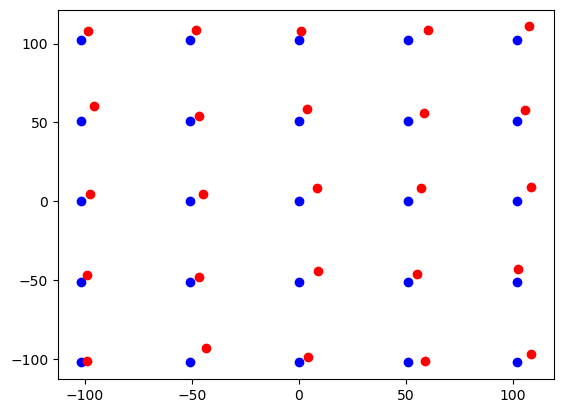

In [41]:
plt.scatter(p[:25, 0], p[:25, 1], c = 'b')
plt.scatter(p[25:, 0], p[25:, 1], c ='r')
plt.show()